Dependecies

In [13]:
library(mice)
library(norm)

# Analysis Functions
These can be used on any of the datasets

In [14]:
build_linear_model = function(data) {
    with(data, lm(
        depress ~ female + phydisab + psydisab + severity + age
    ))
}

In [41]:
plot_residuals = function(model, multiple_datasets=FALSE) {
    
    if (multiple_datasets) {
        residual_val = NULL
        predicted_val = NULL
        for (i in 1:num_imputed_datasets) {
            residual_val = rbind(residual_val,residuals(model$analyses[[i]]))
            model_residuals = colMeans(residual_val)

            predicted_val = rbind(predicted_val,predict(model$analyses[[i]]))
            model_predictions = colMeans(predicted_val)
        }
    } else {
        model_residuals = model$residuals
        model_predictions = model$predictions
    }
    plot(model_residuals,model_predictions,xlab='residuals',ylab='predictions')
}

# Dataset
Load and examine the dataset

In [16]:
# Note: data have been manually cleaned somewhat;
# tabs have been coverted to spaces for consistency
raw_data = read.table('pain.dat', sep=' ', header=TRUE, na.strings='.')
raw_data$female = raw_data$female == 1
raw_data$severity = factor(raw_data$severity, levels=1:6, ordered=TRUE)
summary(raw_data)

   female           depress         phydisab       psydisab     severity 
 Mode :logical   Min.   :1.100   Min.   : 5.0   Min.   : 4.80   1   :29  
 FALSE:130       1st Qu.:3.100   1st Qu.: 8.3   1st Qu.: 9.70   2   :30  
 TRUE :180       Median :3.900   Median : 9.9   Median :10.90   3   :43  
                 Mean   :3.792   Mean   :10.0   Mean   :10.95   4   :72  
                 3rd Qu.:4.400   3rd Qu.:11.7   3rd Qu.:12.30   5   :90  
                 Max.   :6.900   Max.   :16.2   Max.   :17.00   6   :30  
                 NA's   :67      NA's   :9      NA's   :4       NA's:16  
      age    
 Min.   : 7  
 1st Qu.:36  
 Median :46  
 Mean   :44  
 3rd Qu.:52  
 Max.   :74  
             

In [17]:
raw_data

female,depress,phydisab,psydisab,severity,age
<lgl>,<dbl>,<dbl>,<dbl>,<ord>,<int>
FALSE,4.5,12.6,9.8,2,44
FALSE,3.2,10.2,10.9,4,52
FALSE,1.8,8.2,10.9,3,35
FALSE,5.7,9.9,9.0,5,7
FALSE,3.9,6.4,9.6,2,34
FALSE,2.2,12.4,12.0,2,43
FALSE,4.4,11.6,9.2,4,26
FALSE,4.9,11.0,11.2,6,51
FALSE,5.2,7.8,10.3,4,33


Get an overview of the missingness pattern

In [18]:
missing_rates = colSums(is.na(raw_data)) / nrow(raw_data)
print(missing_rates)

    female    depress   phydisab   psydisab   severity        age 
0.00000000 0.21612903 0.02903226 0.01290323 0.05161290 0.00000000 


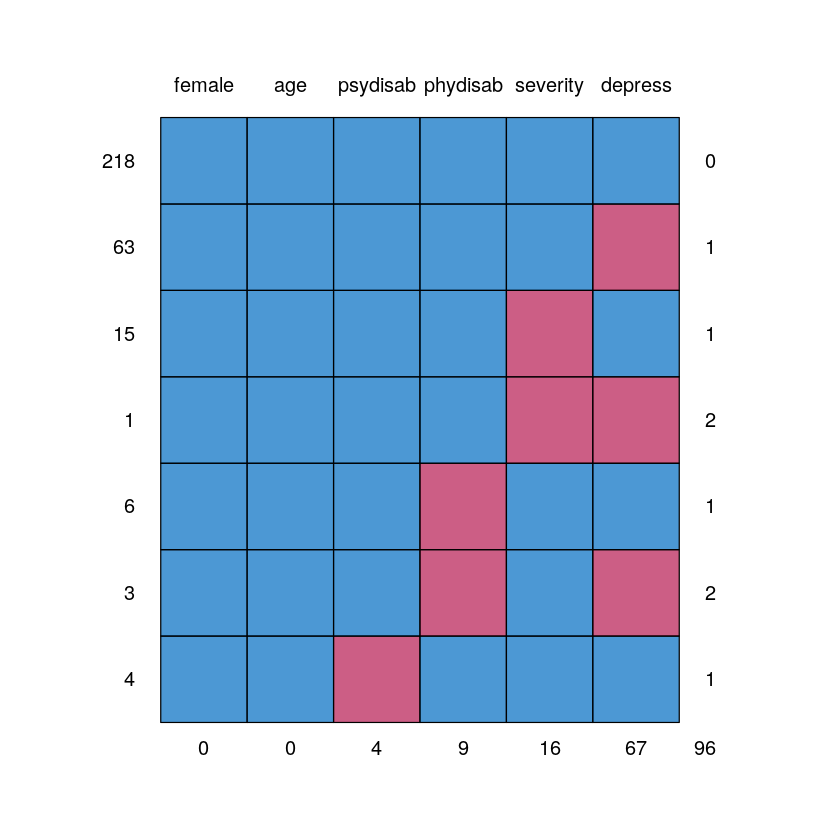

In [19]:
tmp = md.pattern(raw_data)

# Complete Case Analysis
## Helper Functions

In [20]:
count_na = function(x) sum(is.na(x))
listwise_deletion = function(data) {
    completeness_mask = apply(data, 1, count_na) == 0
    return(subset(data, completeness_mask))
}

## Application

In [21]:
complete_case_data = listwise_deletion(raw_data)
summary(complete_case_data)

   female           depress         phydisab        psydisab     severity
 Mode :logical   Min.   :1.400   Min.   : 5.00   Min.   : 4.80   1:23    
 FALSE:96        1st Qu.:3.200   1st Qu.: 7.90   1st Qu.: 9.20   2:25    
 TRUE :122       Median :3.900   Median : 9.30   Median :10.60   3:38    
                 Mean   :3.811   Mean   : 9.35   Mean   :10.37   4:54    
                 3rd Qu.:4.400   3rd Qu.:10.80   3rd Qu.:11.40   5:63    
                 Max.   :6.900   Max.   :14.20   Max.   :14.90   6:15    
      age      
 Min.   : 7.0  
 1st Qu.:34.0  
 Median :43.5  
 Mean   :43.0  
 3rd Qu.:52.0  
 Max.   :74.0  

## Analysis

In [22]:
complete_case_model = build_linear_model(complete_case_data)

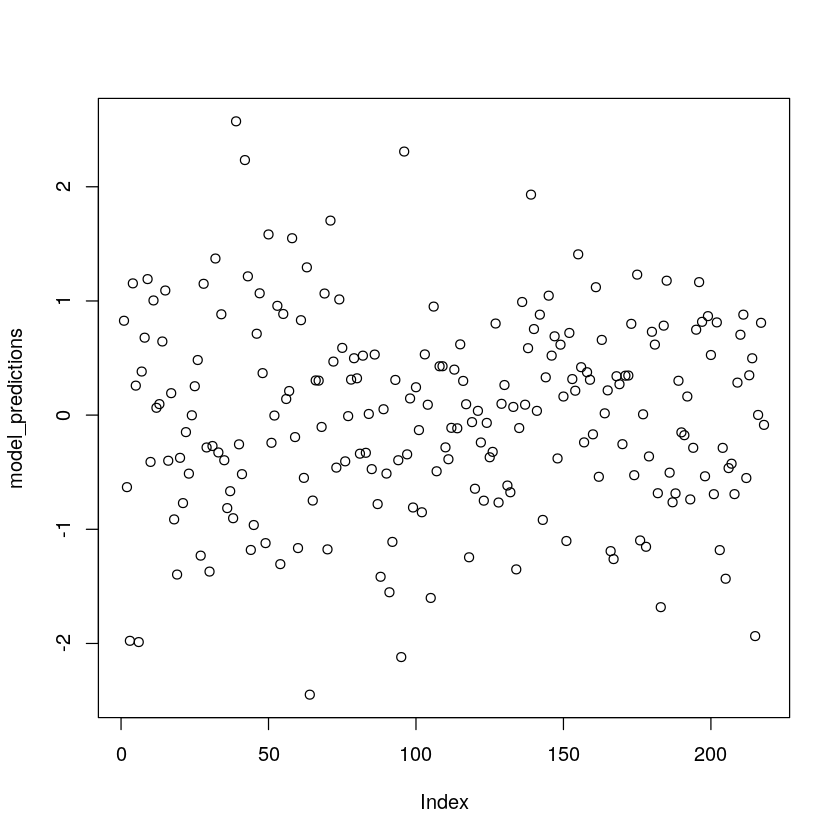

In [26]:
plot_residuals(complete_case_model)

# Multiple Imputation
## Helper functions

In [27]:
num_imputed_datasets = 20
num_entries = nrow(raw_data)
CONTINUOUS_COLS = c('depress','phydisab','psydisab','age')

summarize_pooled_results = function(mi_results,
        summary_cols=CONTINUOUS_COLS, mr=missing_rates,
        m=num_imputed_datasets, n=num_entries,
        precision=3) {
    imputed_datasets = complete(mi_results, 'all')

    # Compute the means for each dataset...
    imputed_means = sapply(imputed_datasets, function(dataset) {
        apply(dataset[summary_cols],2,mean)
    })
    
    # ...then combine them...
    grand_means = apply(imputed_means,1,mean)
    
    # ...and compute summary statistics
    
    std_err = sapply(imputed_datasets, function(dataset) {
        apply(dataset[summary_cols],2,sd) / sqrt(n)
    })
    
    within_impute_var = apply(std_err^2,1,mean)
    
    btw_impute_var = rep(NA,length(summary_cols))
    names(btw_impute_var) = names(within_impute_var)

    for (j in 1:nrow(imputed_means)) {
        btw_impute_var[j] = sum((imputed_means[j,] -
            grand_means[j])^2 / (m - 1))
    }

    total_var = within_impute_var + btw_impute_var +
        btw_impute_var / m
    total_std_err = sqrt(total_var)
    
    fmi = (btw_impute_var + btw_impute_var/m) / total_std_err
    
    pooled_stats = round(data.frame(
        mean=grand_means,Vw=within_impute_var,Vb=btw_impute_var,
        SE=total_std_err,Vt=total_var,FMI=fmi,MR=mr[summary_cols]),precision)
    
    return(pooled_stats)
}

## Imputation

In [28]:
mi_data = mice(raw_data, m=num_imputed_datasets, maxit=20, seed=664,
    defaultMethod=c('norm.nob','logreg','lda','polr'))


 iter imp variable
  1   1  depress  phydisab  psydisab  severity
  1   2  depress  phydisab  psydisab  severity
  1   3  depress  phydisab  psydisab  severity
  1   4  depress  phydisab  psydisab  severity
  1   5  depress  phydisab  psydisab  severity
  1   6  depress  phydisab  psydisab  severity
  1   7  depress  phydisab  psydisab  severity
  1   8  depress  phydisab  psydisab  severity
  1   9  depress  phydisab  psydisab  severity
  1   10  depress  phydisab  psydisab  severity
  1   11  depress  phydisab  psydisab  severity
  1   12  depress  phydisab  psydisab  severity
  1   13  depress  phydisab  psydisab  severity
  1   14  depress  phydisab  psydisab  severity
  1   15  depress  phydisab  psydisab  severity
  1   16  depress  phydisab  psydisab  severity
  1   17  depress  phydisab  psydisab  severity
  1   18  depress  phydisab  psydisab  severity
  1   19  depress  phydisab  psydisab  severity
  1   20  depress  phydisab  psydisab  severity
  2   1  depress  phydisab  p

In [29]:
summarize_pooled_results(mi_data, precision=5)

,mean,Vw,Vb,SE,Vt,FMI,MR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
depress,3.96434,0.00386,0.00031,0.06473,0.00419,0.00508,0.21613
phydisab,9.98785,0.01606,0.00014,0.12729,0.01620,0.00114,0.02903
psydisab,10.93652,0.01383,0.00006,0.11790,0.01390,0.00056,0.01290
age,44.00000,0.48798,0.00000,0.69856,0.48798,0.00000,0.00000


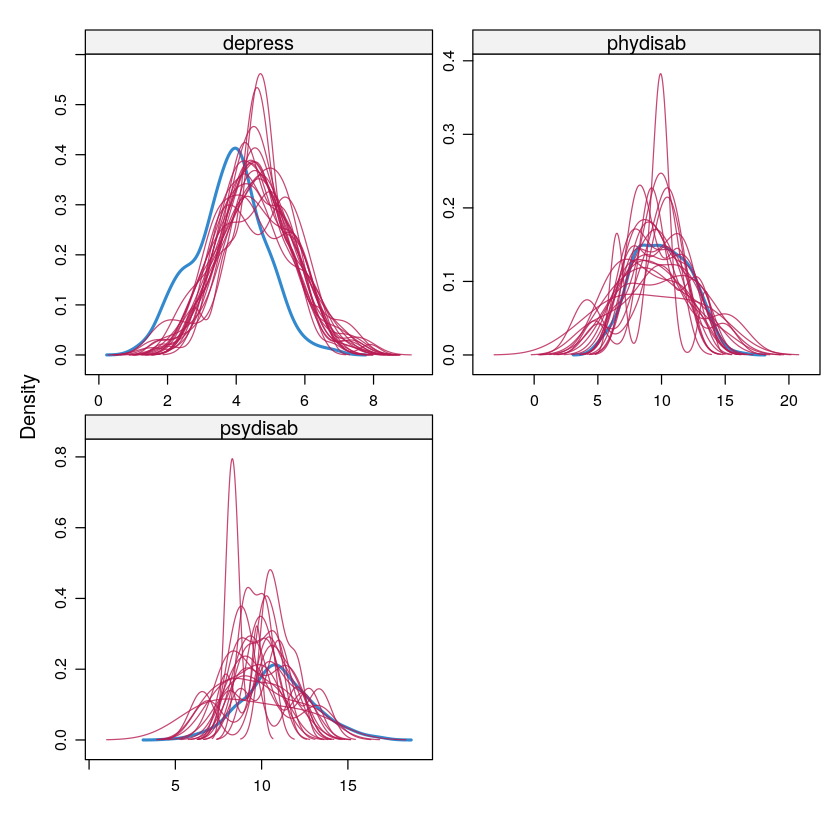

In [30]:
densityplot(mi_data)

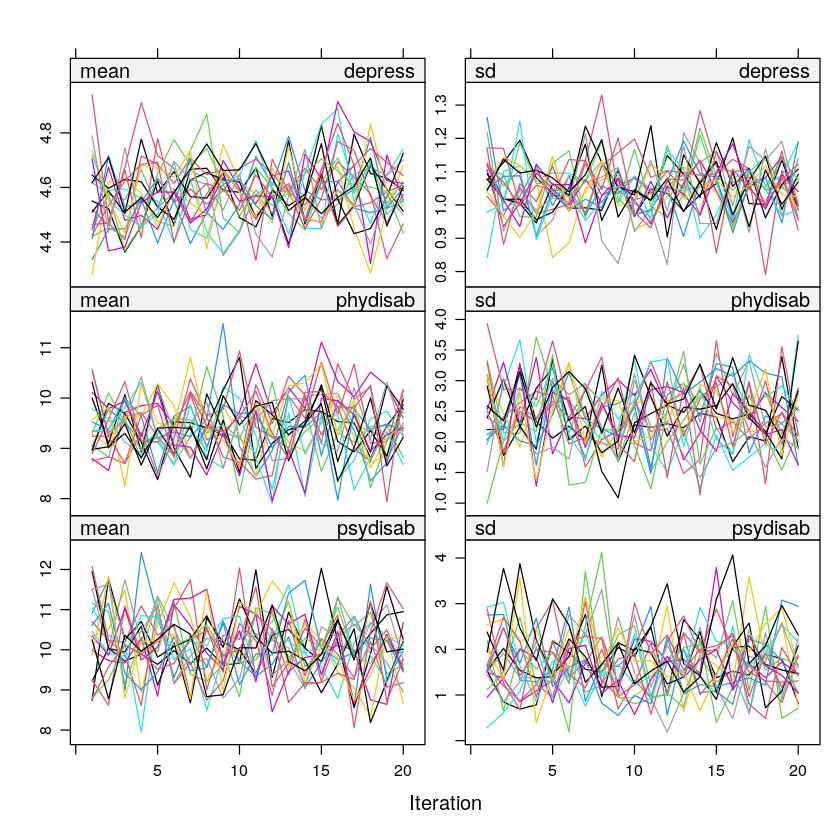

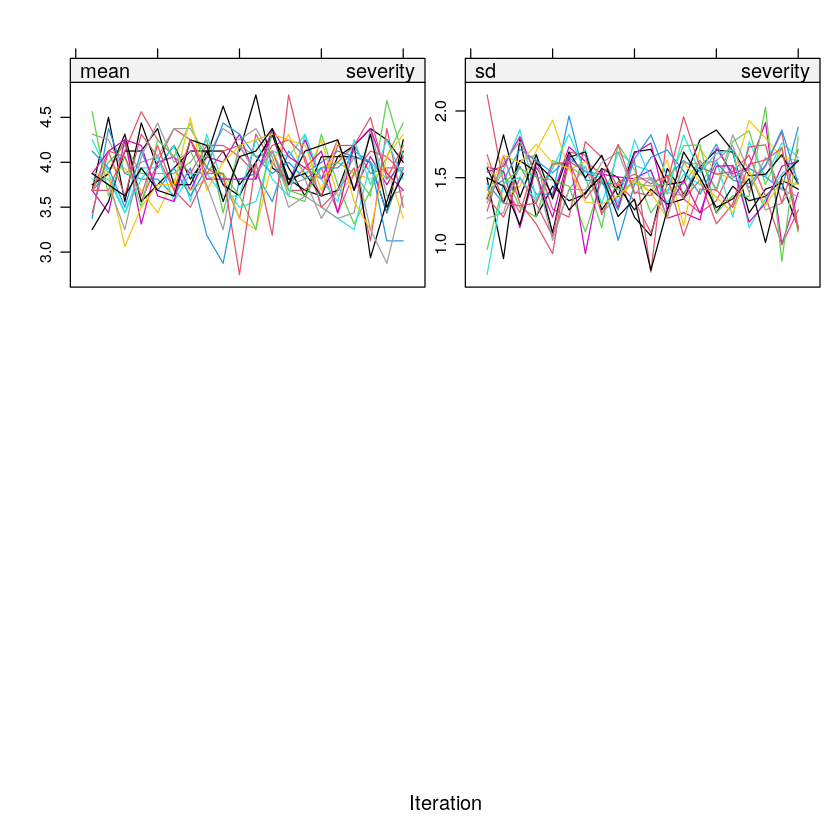

In [31]:
plot(mi_data)

## Analysis
Now we fit a linear regression model to the imputed data

In [34]:
mi_model = build_linear_model(mi_data)

In [35]:
summary(pool(mi_model))

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.00631594,0.368787878,5.4402980,155.74327,2.022811e-07
femaleTRUE,-0.15804531,0.111790796,-1.4137596,162.76000,1.593423e-01
phydisab,0.04331748,0.030463910,1.4219277,188.92262,1.566960e-01
psydisab,0.23916442,0.031238491,7.6560810,177.91587,1.175726e-12
severity.L,0.41536143,0.168371917,2.4669282,214.49648,1.441119e-02
severity.Q,0.22203324,0.158499509,1.4008450,158.68195,1.632130e-01
severity.C,-0.16750297,0.166169255,-1.0080263,87.39219,3.162247e-01
severity^4,-0.08917841,0.139948634,-0.6372224,173.46901,5.248201e-01
severity^5,0.12323478,0.131181835,0.9394195,171.20703,3.488389e-01


In [36]:
pool.r.squared(mi_model,adjusted=TRUE)

,est,lo 95,hi 95,fmi
adj R^2,0.3731883,0.2750668,0.4690264,0.2389519


In [37]:
tidy(pool(mi_model),conf.int=TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high,b,df,dfcom,fmi,lambda,m,riv,ubar
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
(Intercept),2.00631594,0.368787878,5.4402980,2.022811e-07,1.27784447,2.73478741,2.649660e-02,155.74327,300,0.2145842,0.2045626,20,0.2571699,1.081831e-01
femaleTRUE,-0.15804531,0.111790796,-1.4137596,1.593423e-01,-0.37879260,0.06270199,2.309024e-03,162.76000,300,0.2037266,0.1940018,20,0.2406975,1.007271e-02
phydisab,0.04331748,0.030463910,1.4219277,1.566960e-01,-0.01677564,0.10341059,1.394070e-04,188.92262,300,0.1665030,0.1577257,20,0.1872617,7.816725e-04
psydisab,0.23916442,0.031238491,7.6560810,1.175726e-12,0.17751878,0.30081006,1.602991e-04,177.91587,300,0.1816287,0.1724806,20,0.2084309,8.075293e-04
severity.L,0.41536143,0.168371917,2.4669282,1.441119e-02,0.08348602,0.74723684,3.382393e-03,214.49648,300,0.1333213,0.1252778,20,0.1432201,2.479759e-02
severity.Q,0.22203324,0.158499509,1.4008450,1.632130e-01,-0.09100750,0.53507399,4.787252e-03,158.68195,300,0.2099823,0.2000874,20,0.2501366,2.009548e-02
severity.C,-0.16750297,0.166169255,-1.0080263,3.162247e-01,-0.49776146,0.16275552,9.105489e-03,87.39219,300,0.3607159,0.3462512,20,0.5296394,1.805146e-02
severity^4,-0.08917841,0.139948634,-0.6372224,5.248201e-01,-0.36539975,0.18704294,3.332050e-03,173.46901,300,0.1879426,0.1786337,20,0.2174837,1.608697e-02
severity^5,0.12323478,0.131181835,0.9394195,3.488389e-01,-0.13570727,0.38217682,2.979756e-03,171.20703,300,0.1912053,0.1818120,20,0.2222130,1.407993e-02


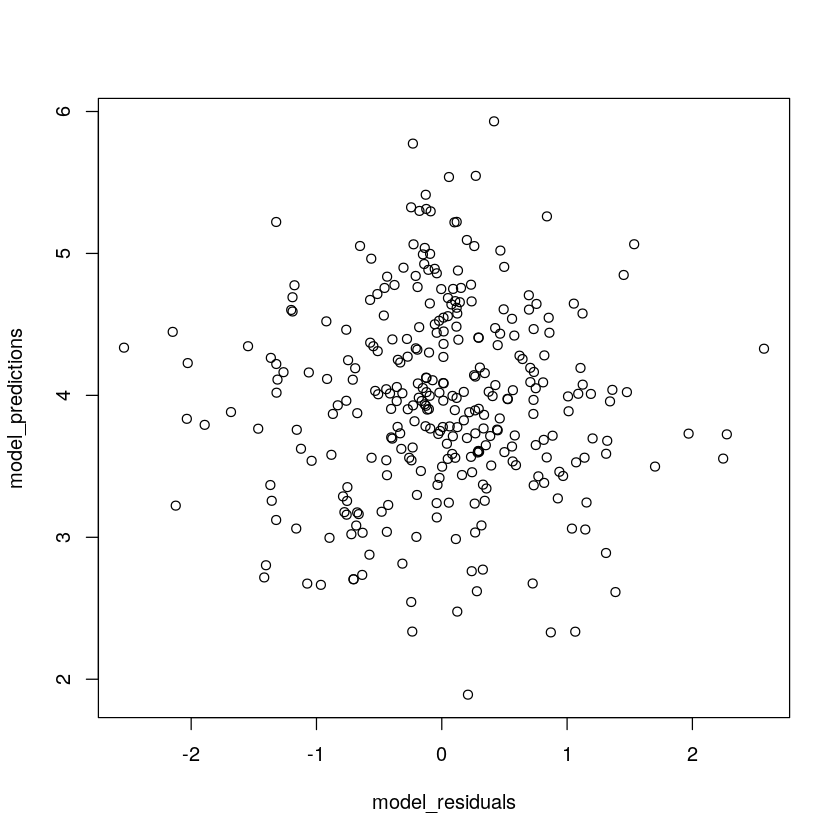

In [38]:
plot_residuals(mi_model, multiple_datasets=TRUE)

# Maximum Likelihood Estimation
## Helper Functions

In [39]:
# Initialize psuedo-random number generator in a reasonably
# unpredictable way
set.seed(as.numeric(Sys.time()))

In [72]:
# Estimate mean, standard deviation, covariance matrix, and correlation
em = function(data, cols=NULL) {
    if (is.null(cols)) {
        cols = names(data)
    }
    
    summary = prelim.norm(data.matrix(data[cols]))
    results_vec = em.norm(summary, showits=FALSE)
    return(getparam.norm(summary, results_vec, corr=TRUE))
}

get_covariance = function(em_results) {
    std_dev = diag(em_results$sdv)
    return(std_dev %*% em_results$r %*% std_dev)
}

# Estimate regression coeffecients, based on example in Likelihood.R
coeff_em = function(data, em_results, indep_col, predictor_cols=NULL,
                   offset=0) {
    if (is.null(predictor_cols)) {
        predictor_cols = data[-indep_col]
    }
    
    covariance = get_covariance(em_results)
    
    covariance_dep = covariance[predictor_cols, predictor_cols]
    covariance_mixed = covariance[predictor_cols, indep_col]
    coeffs = solve(covariance_dep) %*% covariance_mixed
    
    intercept = em_results$mu[indep_col] -
        sum(coeffs * em_results$mu[predictor_cols])
    coeffs = rbind(c(intercept), coeffs)
    
    rownames(coeffs) = append(c('(Intercept)'), colnames(data)[offset+predictor_cols])
    
    return(data.frame(coeffs))
}

## Estimation

In [69]:
em_results = em(raw_data, cols=c('depress','phydisab','psydisab'))
em_results

1.0000000,0.2943664,0.5156738
0.2943664,1.0000000,0.5211676
0.5156738,0.5211676,1.0000000


## Analysis

In [79]:
library(stats)

In [82]:
any(is.na(complete_case_data))

[1] FALSE

In [88]:
em_model_coeffs = coeff_em(raw_data, em_results, 1, predictor_cols=c(2,3),offset=1)
em_model_coeffs

,coeffs
,<dbl>
(Intercept),0.92675777
phydisab,0.01716625
psydisab,0.26048918


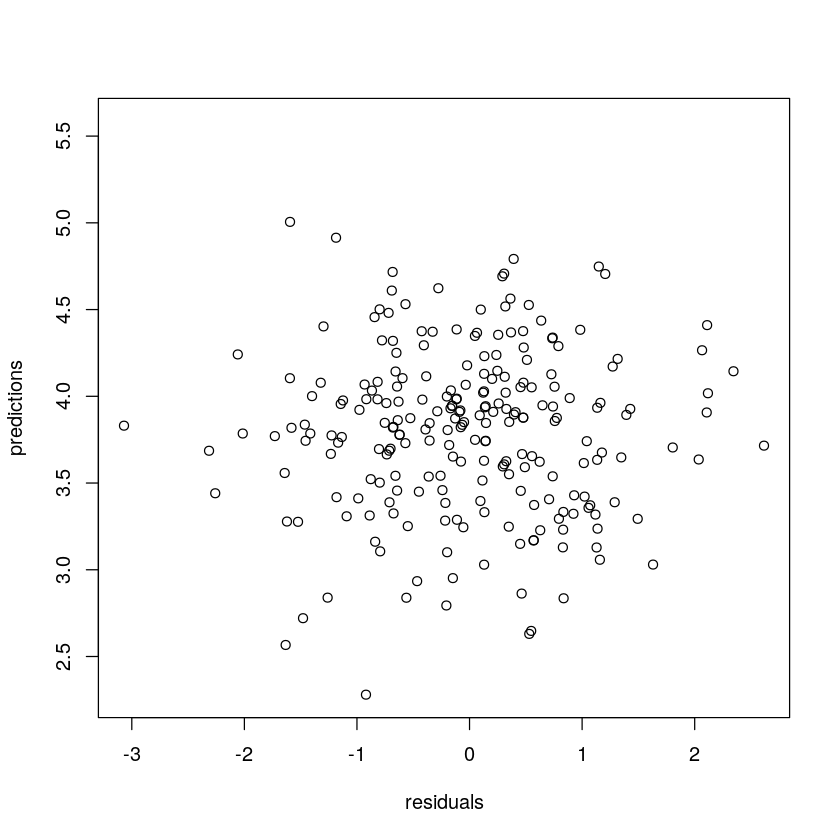

In [99]:
em_model_predictions = em_model_coeffs$coeffs[1] +
    em_model_coeffs$coeffs[2]*raw_data$phydisab +
    em_model_coeffs$coeffs[3]*raw_data$psydisab
em_model_residuals = em_model_predictions - raw_data$depress

plot(em_model_residuals,em_model_predictions,
     xlab='residuals',ylab='predictions')